Converged after 502 iterations
     0         1         2         3         4         5         6         7   \
0   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.0  0.002724  0.005520  0.008462  0.011627  0.015105  0.018996  0.023419   
2   0.0  0.005378  0.010897  0.016701  0.022946  0.029803  0.037466  0.046166   
3   0.0  0.007894  0.015992  0.024506  0.033660  0.043702  0.054910  0.067608   
4   0.0  0.010207  0.020677  0.031678  0.043498  0.056447  0.070877  0.087187   
5   0.0  0.012263  0.024837  0.038043  0.052219  0.067730  0.084982  0.104433   
6   0.0  0.014011  0.028374  0.043451  0.059621  0.077291  0.096909  0.118974   
7   0.0  0.015412  0.031208  0.047780  0.065541  0.084927  0.106417  0.130533   
8   0.0  0.016435  0.033276  0.050938  0.069855  0.090486  0.113326  0.138915   
9   0.0  0.017057  0.034534  0.052859  0.072477  0.093861  0.117517  0.143990   
10  0.0  0.017266  0.034956  0.053503  0.073357  0.094993  0.118921  0.145690 

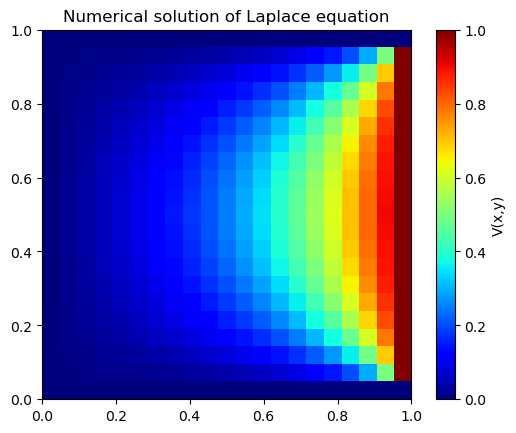

In [5]:
import numpy as np
import pandas as pd

# 設定網格大小和初始條件
grid_size = 21
V = np.zeros((grid_size, grid_size))

# 設定邊界條件
V[:, 0] = 0  # V(x, 0) = 0
V[:, -1] = 1  # V(x, 1) = 1
V[0, :] = 0  # V(0, y) = 0
V[-1, :] = 0  # V(1, y) = 0

# 鬆弛法參數
tolerance = 1e-5
max_iterations = 10000

# 鬆弛法迭代
for iteration in range(max_iterations):
    V_old = V.copy()
    
    for i in range(1, grid_size - 1):
        for j in range(1, grid_size - 1):
            V[i, j] = 0.25 * (V_old[i+1, j] + V_old[i-1, j] + V_old[i, j+1] + V_old[i, j-1])
    
    # 檢查收斂性
    if np.max(np.abs(V - V_old)) < tolerance:
        print(f'Converged after {iteration+1} iterations')
        break

# 將數值解轉換為 DataFrame 並顯示給用戶
V_df = pd.DataFrame(V)

# 調整顯示設置
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#確保所有資料都會被顯示，而不會被省略。

print(V_df)

# 如果需要可視化結果
import matplotlib.pyplot as plt
plt.imshow(V, extent=[0, 1, 0, 1], origin='lower', cmap='jet')
plt.colorbar(label='V(x,y)')
plt.title('Numerical solution of Laplace equation')
plt.show()

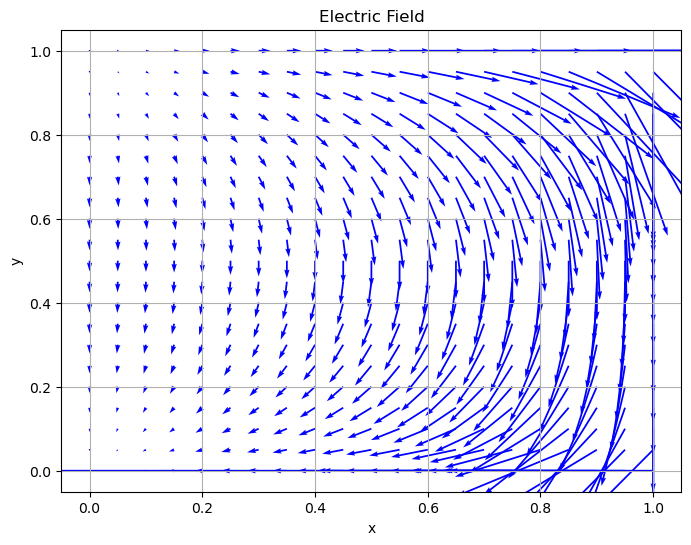

In [6]:
import numpy as np

# 初始化參數
N = 21
delta = 1/20
tolerance = 1e-5
V = np.zeros((N, N))

# 設定邊界條件
V[:, 0] = 0
V[:, -1] = 1
V[0, :] = 0
V[-1, :] = 0

# 迭代計算
while True:
    V_old = V.copy()
    for j1 in range(1, N-1):
        for j2 in range(1, N-1):
            V[j1, j2] = 0.25 * (V_old[j1+1, j2] + V_old[j1-1, j2] + V_old[j1, j2+1] + V_old[j1, j2-1])
    
    # 計算變化量
    change = np.max(np.abs(V - V_old))
    if change < tolerance:
        break

import matplotlib.pyplot as plt
# 計算電場
Ex, Ey = np.gradient(-V, delta)

# 繪製電場圖
x = np.arange(0, 1 + delta, delta)
y = np.arange(0, 1 + delta, delta)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))
plt.quiver(X, Y, Ex, Ey, scale=20, color='b')
plt.title('Electric Field')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()